## Credit Card Fraud Detection Using Unsupervised Machine Learning Algorithm- part 1
#### ( undersampling condition)

In [4]:
import pandas as pd

In [6]:
data=pd.read_csv("C:\\Users\\usark\\OneDrive\\Desktop\\ML Datasets\\creditcard.csv")

In [7]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Data Preprocessing:

In [82]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
IF        0
dtype: int64

In [84]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [85]:
data['Amount']=sc.fit_transform(pd.DataFrame(data["Amount"]))

In [88]:
data.head(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0


In [89]:
data.duplicated().any()

True

In [90]:
data.duplicated().sum()

1081

In [91]:
data.shape

(284807, 31)

In [93]:
data=data.drop_duplicates()

In [95]:
data.shape

(283726, 31)

In [119]:
data.Class.value_counts()

0    283253
1       473
Name: Class, dtype: int64

In [ ]:
#so data is imbalanced.

# Handling Imbalanced Data

In [120]:
#Undersampling

normal=data[data["Class"]==0]

In [121]:
fraud=data[data["Class"]==1]

In [123]:
normal.shape

(283253, 31)

In [124]:
fraud.shape

(473, 31)

In [125]:
# now balance data on both fraud & normal txns

normal_sample=normal.sample(n=473)

In [126]:
Ndata=pd.concat([fraud,normal_sample],ignore_index=True)

In [127]:
Ndata.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,-0.353229,1
1,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,1.761758,1
2,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,0.606031,1
3,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,-0.117342,1
4,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,-0.349231,1


In [130]:
X=Ndata.drop(columns="Class")

In [131]:
y=Ndata.Class

In [132]:
from sklearn.model_selection import train_test_split

In [133]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2)

# 1. Isolation Forest

In [134]:
 from sklearn.ensemble import IsolationForest

In [161]:
model=IsolationForest(n_estimators=100, contamination=0.01,random_state=42)
model

IsolationForest(contamination=0.01, random_state=42)

In [208]:
model.fit(X_train,Y_train)

IsolationForest(contamination=0.01, random_state=42)

In [209]:
## Predict anomalies (fraud) using the trained model

y_predicted=model.predict(X_test)

In [210]:
y_predicted

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1])

In [211]:
# Convert predictions to binary values (1 for inliers, -1 for outliers/anomalies)

In [212]:
y_pred_binary=[1 if pred==1 else 0 for pred in y_predicted]

# Evaluate the performance of your model using classification metrics like precision, recall, F1-score, and confusion matrix.

In [213]:
from sklearn.metrics import recall_score,f1_score,precision_score,accuracy_score

In [214]:
acc=accuracy_score(y_pred_binary,Y_test)
acc

0.4263157894736842

In [215]:
acc=recall_score(y_pred_binary,Y_test)
acc

0.42857142857142855

In [216]:
acc=f1_score(y_pred_binary,Y_test)
acc

0.5977859778597785

In [217]:
acc=precision_score(y_pred_binary,Y_test)
acc

0.9878048780487805

# Confusion Matrix

In [218]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

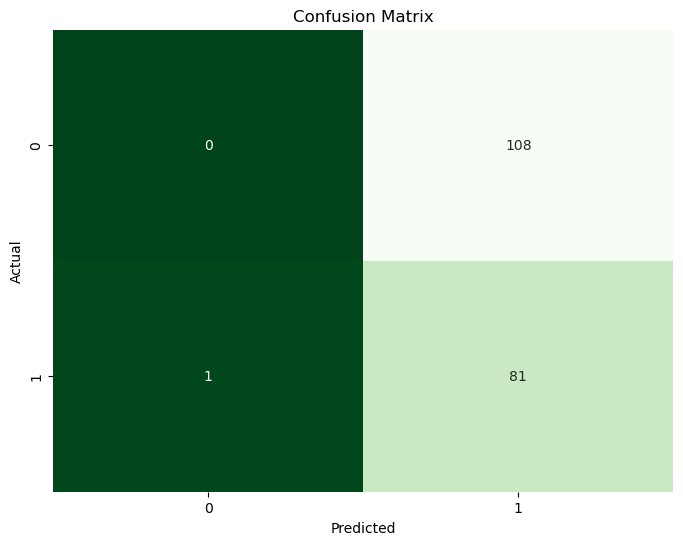

<Figure size 640x480 with 0 Axes>

In [219]:
# Create a confusion matrix
conf_matrix = confusion_matrix(Y_test, y_pred_binary)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Greens_r', fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.figure()
plt.show()

In [231]:
# Print classification report
print("Classification Report:")
print(classification_report(Y_test, y_pred_binary))


Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       108
           1       0.43      0.99      0.60        82

    accuracy                           0.43       190
   macro avg       0.21      0.49      0.30       190
weighted avg       0.18      0.43      0.26       190



# 2. one class SVM

In [173]:
from sklearn.svm import OneClassSVM

In [220]:
model2 = OneClassSVM(kernel='rbf', nu=0.01)
model2

OneClassSVM(nu=0.01)

In [221]:
model2.fit(X_train)

OneClassSVM(nu=0.01)

In [222]:
y_pred2=model2.predict(X_test)

In [223]:
y_pred_binary2 = [1 if pred == -1 else 0 for pred in y_pred2]

In [225]:
conf_matrix2 = confusion_matrix(Y_test, y_pred_binary2)

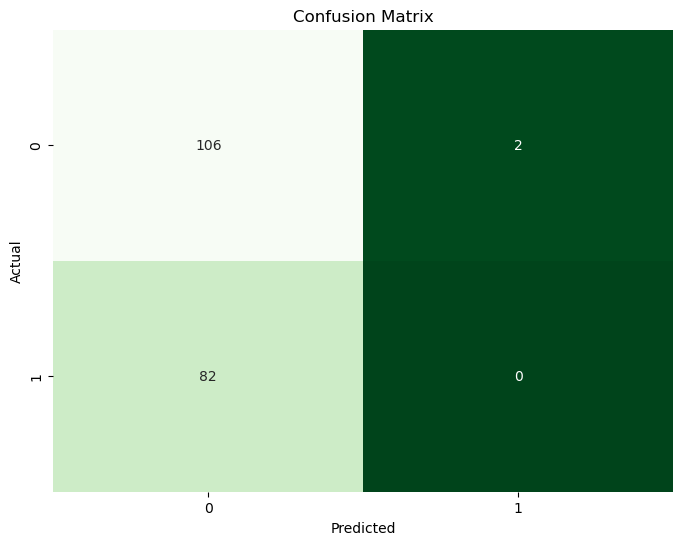

<Figure size 640x480 with 0 Axes>

In [226]:

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix2, annot=True, cmap='Greens_r', fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.figure()
plt.show()

In [229]:
from sklearn.metrics import confusion_matrix, classification_report

In [230]:
# Print classification report
print("Classification Report:")
print(classification_report(Y_test, y_pred_binary2))


Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.98      0.72       108
           1       0.00      0.00      0.00        82

    accuracy                           0.56       190
   macro avg       0.28      0.49      0.36       190
weighted avg       0.32      0.56      0.41       190



In [234]:
from sklearn.metrics import accuracy_score

# Convert actual labels to binary (0: normal, 1: anomaly) for comparison
y_test_binary2 = [1 if label == 1 else 0 for label in Y_test]

# Calculate accuracy score
accuracy = accuracy_score(y_test_binary2, y_pred_binary2)
precision = precision_score(y_test_binary2, y_pred_binary2)
f1 = f1_score(y_test_binary2, y_pred_binary2)
recall = recall_score(y_test_binary2, y_pred_binary2)
# Print the accuracy score
print("Accuracy:", accuracy)
print("Precision:",precision)
print("F1:", f1)
print("recall:",recall)


Accuracy: 0.5578947368421052
Precision: 0.0
F1: 0.0
recall: 0.0
